In [2]:
import tensorflow as tf
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import *
from keras.layers import *
from keras.utils import *
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
import glob
import os
import librosa
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import tensorflow_io as tfio
from IPython.display import Audio

In [3]:
classes = ['Ahmed_Gamal', 'Ahmed_Abdelhady', 'Unkwon']

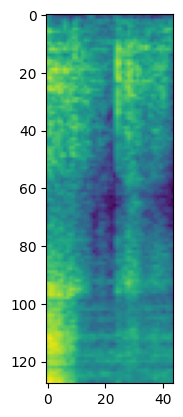

In [4]:
y, sr = librosa.load('data/Ahmed_Gamal.99.mp3')
data = librosa.util.normalize(y)
data = librosa.util.fix_length(data= data, size=sr)
data = librosa.util.normalize(data)
spec = librosa.feature.melspectrogram(y=data, sr=sr, hop_length=512, fmax=8000)
spec_db = librosa.power_to_db(spec, ref= np.max)
plt.imshow(spec_db)
# spec_db.shape

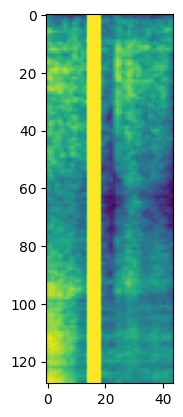

In [5]:
freq_mask = tfio.audio.freq_mask(spec_db, param=10)
plt.imshow(freq_mask)
# freq_mask.numpy().shape

In [6]:
spec_db.shape

(128, 44)

In [7]:
freq_mask.numpy().shape

(128, 44)

In [8]:
glob.glob('data/*')[150].split('.')[0] == 'data\\Ahmed_Abdelhady'

True

In [9]:
def aug(audio):
    y, sr = librosa.load(audio)
    data = librosa.util.normalize(y)
    data = librosa.util.fix_length(data= data, size=sr)
    data = librosa.util.normalize(data)
    spec = librosa.feature.melspectrogram(y=data, sr=sr, hop_length=512, fmax=8000)
    spec_db = librosa.power_to_db(spec, ref= np.max)
    freq_mask = tfio.audio.freq_mask(spec_db, param=10)
    return freq_mask.numpy()
def load_data(audio):
    y, sr = librosa.load(audio)
    data = librosa.util.normalize(y)
    data = librosa.util.fix_length(data= data, size=sr)
    data = librosa.util.normalize(data)
    spec = librosa.feature.melspectrogram(y=data, sr=sr, hop_length=512, fmax=8000)
    spec_db = librosa.power_to_db(spec, ref= np.max)
    return spec_db
def aug_1(audio):
    y, sr = librosa.load(audio)
    data = librosa.util.normalize(y)
    data = librosa.util.fix_length(data= data, size=sr)
    data = librosa.util.normalize(data)
    spec = librosa.feature.melspectrogram(y=data, sr=sr, hop_length=512, fmax=8000)
    spec_db = librosa.power_to_db(spec, ref= np.max)
    time_mask = tfio.audio.time_mask(spec_db, param=10)
    return time_mask.numpy()

dataset = []
aug_dataset = []
dataset_label = []
aug_dataset_label = []

for audio in glob.glob('data/*'):
    if audio.split('.')[0] == 'data\\Ahmed_Gamal':
        data = load_data(audio)
        data = np.mean(data.T, axis=0)
        dataset.append(data)
        dataset_label.append(0)
        data_aug1 = aug_1(audio)
        data_aug1 = np.mean(data_aug1.T, axis=0)
        aug_dataset.append(data_aug1)
        aug_dataset_label.append(0)
        data_aug = aug(audio)
        data_aug = np.mean(data_aug.T, axis=0)
        aug_dataset.append(data_aug)
        aug_dataset_label.append(0)
        
    elif audio.split('.')[0] == 'data\\Ahmed_Abdelhady':
        data = load_data(audio)
        data = np.mean(data.T, axis=0)
        dataset.append(data)
        dataset_label.append(1)
        data_aug1 = aug_1(audio)
        data_aug1 = np.mean(data_aug1.T, axis=0)
        aug_dataset.append(data_aug1)
        aug_dataset_label.append(1)
        data_aug = aug(audio)
        data_aug = np.mean(data_aug.T, axis=0)
        aug_dataset.append(data_aug)
        aug_dataset_label.append(1)
        
    else:
        data = load_data(audio)
        data = np.mean(data.T, axis=0)
        dataset.append(data)
        dataset_label.append(2)
        data_aug1 = aug_1(audio)
        data_aug1 = np.mean(data_aug1.T, axis=0)
        aug_dataset.append(data_aug1)
        aug_dataset_label.append(2)
        data_aug = aug(audio)
        data_aug = np.mean(data_aug.T, axis=0)
        aug_dataset.append(data_aug)
        aug_dataset_label.append(2)

In [10]:
data = dataset + aug_dataset
label = dataset_label + aug_dataset_label
df = pd.DataFrame(list(zip(data, label)), columns=['features', 'label'])

In [11]:
df

features  label
0     [-47.697636, -51.558815, -53.706223, -54.21703...      2
1     [-39.48367, -43.731686, -47.19318, -44.385365,...      2
2     [-36.00963, -43.539062, -47.78155, -43.49435, ...      2
3     [-46.472843, -50.72612, -46.495888, -42.50551,...      2
4     [-42.250233, -47.51032, -51.88612, -52.780117,...      2
...                                                 ...    ...
1006  [-38.823204, -35.252987, -33.248287, -29.84010...      2
1007  [-50.50963, -50.210392, -48.409092, -45.501476...      2
1008  [-48.36597, -47.91554, -46.45383, -43.89816, -...      2
1009  [-45.54731, -46.078716, -47.110058, -45.424892...      2
1010  [-40.056057, -40.42864, -41.215862, -39.455185...      2

[1011 rows x 2 columns]

In [12]:
df['label'].value_counts()

2    384
1    327
0    300
Name: label, dtype: int64

In [13]:
x = np.array(df['features'].to_list())
y = np.array(df['label'].to_list())
x = np.expand_dims(x, axis=-1)
y = to_categorical(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0, stratify=y)

In [14]:
x[0].shape

(128, 1)

In [15]:
data[0].shape, x.shape

((128,), (1011, 128, 1))

In [16]:
y_train.shape

(808, 3)

In [17]:
x_train.shape

(808, 128, 1)

In [18]:
x_train[0].shape

(128, 1)

In [22]:

# model = Sequential()
# model.add(Dense(256, input_shape= (128,), activation= 'relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(3, activation='softmax'))
# model.summary()


# model.compile(loss= 'sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=8)


input_shape = x_train[0].shape

inputs = Input(shape=input_shape)

x = Conv1D(16, 3, activation='relu')(inputs)
x = MaxPooling1D(2)(x)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(2)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(2)(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(3, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 1)]          0         
                                                                 
 conv1d_3 (Conv1D)           (None, 126, 16)           64        
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 63, 16)           0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 61, 32)            1568      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 30, 32)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 28, 64)            6208

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=8)

Epoch 1/10
101/101 [==============================] - 2s 12ms/step - loss: 1.1001 - accuracy: 0.6498 - val_loss: 0.4733 - val_accuracy: 0.8079
Epoch 2/10
101/101 [==============================] - 1s 11ms/step - loss: 0.3351 - accuracy: 0.8601 - val_loss: 0.3102 - val_accuracy: 0.8818
Epoch 3/10
101/101 [==============================] - 1s 10ms/step - loss: 0.1968 - accuracy: 0.9245 - val_loss: 0.2465 - val_accuracy: 0.8916
Epoch 4/10
101/101 [==============================] - 1s 10ms/step - loss: 0.1270 - accuracy: 0.9493 - val_loss: 0.2106 - val_accuracy: 0.9064
Epoch 5/10
101/101 [==============================] - 1s 11ms/step - loss: 0.0797 - accuracy: 0.9740 - val_loss: 0.1706 - val_accuracy: 0.9507
Epoch 6/10
101/101 [==============================] - 1s 11ms/step - loss: 0.0638 - accuracy: 0.9802 - val_loss: 0.2053 - val_accuracy: 0.9064
Epoch 7/10
101/101 [==============================] - 1s 11ms/step - loss: 0.0422 - accuracy: 0.9926 - val_loss: 0.0781 - val_accuracy: 0.9754

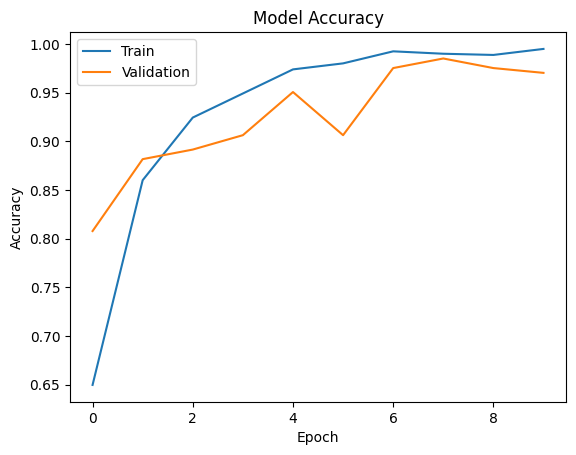

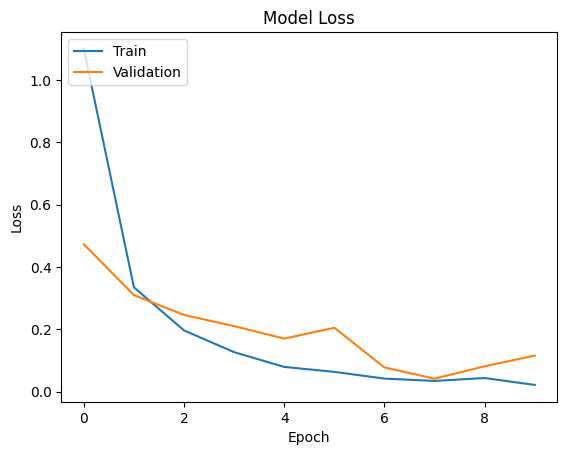

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc= 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc= 'upper left')
plt.show()

In [36]:
model.save('model.h5')

In [76]:
# data = load_data('4444.mp3')
# data = np.mean(data.T, axis=0)
# # data = np.expand_dims(data, axis=-1)
# data = np.expand_dims(data, axis=0)

# classes[np.argmax(model.predict(data))]
# # data.shape

In [35]:
path =r"C:\Users\user\OneDrive - Delta Academy for Science\Desktop\WhatsApp Audio 2023-05-16 at 17.12.49.waptt.opus"
path1 = "files (online-audio-converter.com) (1)/sada.mp3"
path2 = 'WhatsApp Audio 2023-05-15 at 08.47.09.dat (online-audio-converter.com).mp3'
Audio(path2)

In [34]:
# x_ = load_data('Ahemd Abdelhady/4444.mp3')
# x_ = np.expand_dims(x_, axis = [1, -1])
y, sr = librosa.load(path2, duration=226)
data = librosa.util.normalize(y)
data = librosa.util.fix_length(data= data, size=sr)
spec = librosa.feature.melspectrogram(y=data, sr=sr, hop_length=512, fmax=8000)
spec_db = librosa.power_to_db(spec, ref= np.max)
x_ = np.mean(spec_db.T, axis=0)
x_ = np.expand_dims(x_, axis =  1)
x_ = np.expand_dims(x_, axis =  0)
classes[np.argmax(model.predict(x_))]
# x_.shape

1/1 [==============================] - 0s 25ms/step


'Ahmed_Gamal'

In [27]:
import sounddevice as sd
import numpy as np
import librosa
import tensorflow as tf

rate = 16000
duration = 10 
chunk_size = int(rate * duration) 

audio_buffer = np.zeros(chunk_size, dtype=np.float32)

frame_count = 0

def make_prediction():
    global audio_buffer, frame_count

    data = librosa.util.normalize(audio_buffer)
    data = librosa.util.fix_length(data= data, size=rate)
    spec = librosa.feature.melspectrogram(y=data, sr=rate, hop_length=512, n_fft=2048, n_mels= 128)
    spec_db = librosa.power_to_db(spec, ref= np.max)
    data = np.mean(spec_db.T, axis=0)
    data = np.expand_dims(data, axis=1)
    data = np.expand_dims(data, axis=0)
        
    prediction = np.argmax(model.predict(data))

    print(f"Predicted class: {classes[prediction]}")
    audio_buffer = np.zeros(chunk_size, dtype=np.float32)
    frame_count = 0

def audio_callback(indata, frames, time, status):
    global audio_buffer, frame_count
    audio_buffer[frame_count * frames:(frame_count + 1) * frames] = indata[:, 0]
    frame_count += 1
    if frame_count * frames >= chunk_size:
        make_prediction()
with sd.InputStream(channels=1, blocksize=chunk_size, samplerate=rate, callback=audio_callback):
    while True:
        pass

1/1 [==============================] - 0s 72ms/step
Predicted class: Unkwon
1/1 [==============================] - 0s 109ms/step
Predicted class: Ahmed_Gamal
1/1 [==============================] - 0s 101ms/step
Predicted class: Ahmed_Gamal
1/1 [==============================] - 0s 100ms/step
Predicted class: Unkwon
1/1 [==============================] - 0s 98ms/step
Predicted class: Ahmed_Gamal
1/1 [==============================] - 0s 132ms/step
Predicted class: Ahmed_Abdelhady
1/1 [==============================] - 0s 111ms/step
Predicted class: Unkwon
1/1 [==============================] - 0s 90ms/step
Predicted class: Ahmed_Abdelhady
1/1 [==============================] - 0s 110ms/step
Predicted class: Ahmed_Abdelhady
1/1 [==============================] - 0s 124ms/step
Predicted class: Ahmed_Abdelhady
1/1 [==============================] - 0s 68ms/step
Predicted class: Ahmed_Abdelhady
1/1 [==============================] - 0s 153ms/step
Predicted class: Unkwon
1/1 [===============

KeyboardInterrupt: 

In [70]:
# import sounddevice as sd
# import numpy as np
# import librosa
# import tensorflow as tf

# # Load the pre-trained model
# model = tf.keras.models.load_model('my_model.h5')

# # Define the mapping from class index to class label
# class_names = ['class_0', 'class_1', 'class_2', 'class_3', 'class_4']

# # Define the audio parameters
# rate = 16000  # Sampling rate
# duration = 10  # Duration of audio to capture (in seconds)
# chunk_size = int(rate * duration)  # Number of samples per frame

# # Define a variable to accumulate audio data
# audio_buffer = np.zeros(chunk_size, dtype=np.float32)

# # Define a variable to count the number of frames received
# frame_count = 0

# # Define a function to make a prediction
# def make_prediction():
#     global audio_buffer, frame_count

#     # Compute the spectrogram of the accumulated audio data
#     mel_spec = librosa.feature.melspectrogram(y=audio_buffer, sr=rate, n_fft=2048, hop_length=512, n_mels=128)
#     log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

#     # Add channel dimension to match input shape of model
#     log_mel_spec = np.expand_dims(log_mel_spec, axis=-1)

#     # Normalize the input data
#     mean = -13.0
#     std = 27.0
#     log_mel_spec_norm = (log_mel_spec - mean) / std

#     # Make a prediction using the pre-trained model
#     prediction = model.predict(log_mel_spec_norm)

#     # Get the predicted class label
#     class_index = np.argmax(prediction)
#     class_label = class_names[class_index]

#     # Print the predicted class label
#     print(f"Predicted class: {class_label}")

#     # Reset the audio buffer and frame count
#     audio_buffer = np.zeros(chunk_size, dtype=np.float32)
#     frame_count = 0

# # Define a callback function to process audio input
# def audio_callback(indata, frames, time, status):
#     global audio_buffer, frame_count

#     # Add the audio data to the buffer
#     audio_buffer[frame_count * frames:(frame_count + 1) * frames] = indata[:, 0]

#     # Increment the frame count
#     frame_count += 1

#     # If the buffer is full, make a prediction
#     if frame_count * frames >= chunk_size:
#         make_prediction()

# # Open the microphone stream
# with sd.InputStream(channels=1, blocksize=chunk_size, samplerate=rate, callback=audio_callback):
#     while True:
#         pass

In [73]:
import sounddevice as sd
RATE = 16000
DURATION = 1
def process_audio(indata, frames, time, status):
    # Convert the audio data to a NumPy array
    audio = np.hstack(indata).astype(np.float32)
    
    # Preprocess the audio data
    data = librosa.util.normalize(audio)
    data = librosa.util.fix_length(data= data, size=rate)
    spec = librosa.feature.melspectrogram(y=data, sr=rate, hop_length=512, n_fft=2048, n_mels= 128)
    spec_db = librosa.power_to_db(spec, ref= np.max)
    data = np.mean(spec_db.T, axis=0)
    # data = np.expand_dims(data, axis=-1)
    data = np.expand_dims(data, axis=0)
    
    # Pass the preprocessed audio data to the model for prediction
    prediction = model.predict(data)
    
    # Get the predicted label and display it to the user
    label_index = np.argmax(prediction)
    label = classes[label_index]
    print('Prediction:', label)

# Start the audio stream and processing loop
with sd.InputStream(channels=1, blocksize=RATE*DURATION, samplerate=RATE,
                    callback=process_audio):
    while True:
        pass

1/1 [==============================] - 0s 129ms/step
Prediction: Unkwon
1/1 [==============================] - 0s 68ms/step
Prediction: Unkwon
1/1 [==============================] - 0s 73ms/step
Prediction: Unkwon
1/1 [==============================] - 0s 101ms/step
Prediction: Unkwon
1/1 [==============================] - 0s 78ms/step
Prediction: Unkwon
1/1 [==============================] - 0s 119ms/step
Prediction: Unkwon
1/1 [==============================] - 0s 138ms/step
Prediction: Unkwon
1/1 [==============================] - 0s 92ms/step
Prediction: Unkwon
1/1 [==============================] - 0s 61ms/step
Prediction: Unkwon
1/1 [==============================] - 0s 116ms/step
Prediction: Unkwon
1/1 [==============================] - 0s 72ms/step
Prediction: Unkwon
1/1 [==============================] - 0s 131ms/step
Prediction: Unkwon
1/1 [==============================] - 0s 116ms/step
Prediction: Unkwon
1/1 [==============================] - 0s 69ms/step
Prediction: Unkwon

KeyboardInterrupt: 

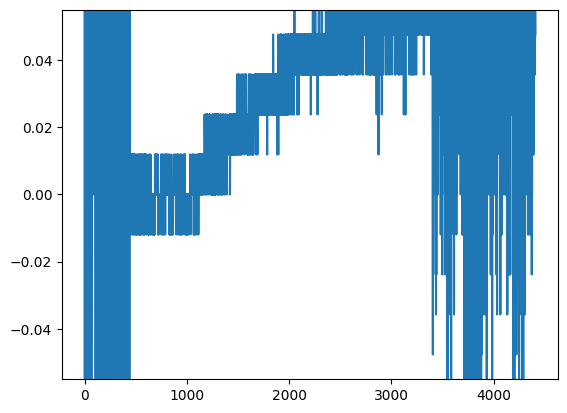

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

KeyboardInterrupt: 

In [3]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt

# Define the audio sampling parameters
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
DURATION = 0.1 # 100 ms
CHUNKSIZE = int(RATE * DURATION)

# Create a Pyaudio stream for capturing audio from the microphone
p = pyaudio.PyAudio()
stream = p.open(format=FORMAT, channels=CHANNELS, rate=RATE,
                input=True, frames_per_buffer=CHUNKSIZE)

# Create a buffer for storing the audio data
buffer = np.zeros(CHUNKSIZE)

# Create a figure and axis for displaying the waveform plot
fig, ax = plt.subplots()
line, = ax.plot(buffer)

# Read and process audio data in real-time
while True:
    data = stream.read(CHUNKSIZE)
    buffer = np.frombuffer(data, dtype=np.int16)
    buffer = buffer / np.max(np.abs(buffer))
    line.set_ydata(buffer)
    plt.draw()
    plt.pause(0.001)

# Stop the audio stream and close the Pyaudio object
stream.stop_stream()
stream.close()
p.terminate()

# Show the waveform plot
plt.show()

In [3]:
import librosa
import os
import soundfile as sf

audio_file = 'files (online-audio-converter.com) (1)/hady.mp3'
y, sr = librosa.load(audio_file, sr=None, duration=226)

segment_length = len(y) // 9

for i in range(9):
    segment_start = i * segment_length
    segment_end = (i + 1) * segment_length
    
    segment = y[segment_start:segment_end]
    
    sf.write(f"Ahmed_Abdelhady.{i+100}.mp3", segment, sr)
